##  第5章 GANによる画像生成の準備ファイル

- 本ファイルでは、第5章で使用するフォルダの作成とファイルのダウンロードを行います。

In [1]:
import os
import urllib.request
import zipfile
import tarfile

import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import numpy as np

In [2]:
# フォルダ「data」が存在しない場合は作成する
data_dir = "./data/"
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

In [4]:
import sklearn
print(sklearn.__version__)

1.3.2


In [ ]:
# AWSのAMIでsklernのversionが0.20より低い場合はバージョンを更新します
# pip install -U scikit-learn

In [5]:
# MNISTの手書き数字画像をダウンロードし読み込みます（2分ほど時間がかかります）
from sklearn.datasets import fetch_openml

#mnist = fetch_openml('mnist_784', version=1, data_home="./data/")  
mnist = fetch_openml('mnist_784', version=1, data_home="./data/", as_frame=False)  
# data_homeは保存先を指定します
# Issue #153 2020年12月にリリースされたsklearn 0.24.0以降の仕様変更に合わせる場合


/home/watanabe/image_env/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [6]:
# データの取り出し
X = mnist.data
y = mnist.target


この画像データのラベルは5です


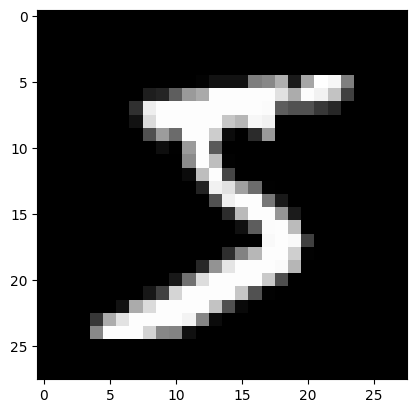

In [7]:
# MNISTのデータの1つ目を可視化する
plt.imshow(X[0].reshape(28, 28), cmap='gray')
print("この画像データのラベルは{}です".format(y[0]))

この画像データのラベルは0です


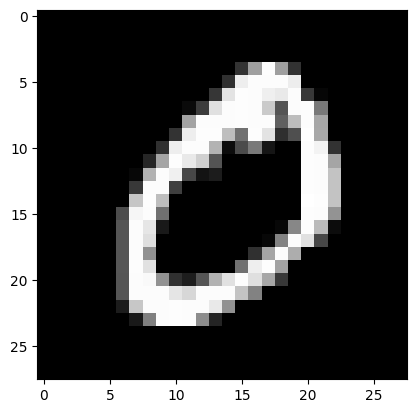

In [8]:
# MNISTのデータの2つ目を可視化する
plt.imshow(X[1].reshape(28, 28), cmap='gray')
print("この画像データのラベルは{}です".format(y[1]))

In [9]:
# フォルダ「data」の下にフォルダ「img_78」を作成する
data_dir_path = "./data/img_78/"
if not os.path.exists(data_dir_path):
    os.mkdir(data_dir_path)

In [10]:
# MNISTから数字7、8の画像だけフォルダ「img_78」に画像として保存していく
count7=0
count8=0
max_num=200  # 画像は200枚ずつ作成する

for i in range(len(X)):
    
    # 画像7の作成
    if (y[i] is "7") and (count7<max_num):
        file_path="./data/img_78/img_7_"+str(count7)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28×28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC)  # 64×64に拡大
        pil_img_f.save(file_path)  # 保存
        count7+=1 
    
    # 画像8の作成
    if (y[i] is "8") and (count8<max_num):
        file_path="./data/img_78/img_8_"+str(count8)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28*28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC)  # 64×64に拡大
        pil_img_f.save(file_path)  # 保存
        count8+=1 



<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:18: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:18: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_1106047/208562682.py:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (y[i] is "7") and (count7<max_num):
/tmp/ipykernel_1106047/208562682.py:18: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (y[i] is "8") and (count8<max_num):


以上